# Coastal Pioneer Coastal Central Inshore Profiler (CP02PMCI) Data Quality Report

**Evaluation Date**: 8/1/2018

**Evaluator**: Yuanyuan Xu

## Review Summary
This report summarizes a data quality review of the Pioneer Coastal Central Inshore Profiler Mooring (CP02PMCI).  I focus on data from the Deployments 3 and 4 (2015-04-30 to 2016-05-20), and compare the profiler's dissolved oxygen data with cruise data collected just one day after the 4th deployment of the profiler mooring. 

## 1. Selected instruments included in this report
In this report, I evaluate dissolved oxygen data from the Pioneer Coastal Central Inshore Profiler (CP02PMCI), focusing on the Deployments 3 and 4. The dissolved oxygen instrument on the profiler is listed for reference.

Instrument | Reference Designator | Method | Stream 
 -- | -- | -- | --
Dissolved Oxygen | [CP02PMCI-WFP01-02-DOFSTK000](http://ooi.visualocean.net/instruments/view/CP02PMCI-WFP01-02-DOFSTK000) | recovered-wfp | dofst_k_wfp_instrument

A graph of data availability is available at http://ooi.visualocean.net/instruments/stats-monthly/CP02PMCI-WFP01-02-DOFSTK000.

In [1]:
# Setup Instrument Variables
site = 'CP02PMCI'
node = 'WFP01'
instrument = '02-DOFSTK000'
method = 'recovered-wfp'
stream = 'dofst_k_wfp_instrument_recovered'

## 2. Time periods of interest
I focus on the following time periods for evaluation:
* April 30, 2015 to May 20, 2016 - All of Deployments 3 and 4 (Part 4)
* One week around October 15, 2015 - The changeover from Deployment 3 to 4 (Part 5)
* October 16, 2015 - The day of the cruise CTD cast (Part 6)


## 3. Related Metadata
In this section, I review some of metadata available in the system to make sure it is present and correct.

Before I get started, I set up Python environment with some libraries, variables and functions I need later in this report.

In [2]:
# Setup the Python processing environment 
import requests
import datetime
import pandas as pd

In [3]:
# API Information
USERNAME =''
TOKEN= ''

DATA_API = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'
VOCAB_API = 'https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv'
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'

In [4]:
# Specify some functions to convert timestamps
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
  
def convert_time(ms):
  if ms != None:
    return datetime.datetime.utcfromtimestamp(ms/1000)
  else:
    return None

### 3a. Vocabulary Metadata
Below are the basic vocabulary information (metadata) from the system to double check the instrument.

In [5]:
# Setup the API request url
data_request_url ='/'.join((VOCAB_API,site,node,instrument))
print(data_request_url)

# Grab the information from the server
r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
data = r.json()
data

https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP02PMCI/WFP01/02-DOFSTK000


[{'@class': '.VocabRecord',
  'model': 'SBE 43F',
  'manufacturer': 'Sea-Bird',
  'vocabId': 494,
  'refdes': 'CP02PMCI-WFP01-02-DOFSTK000',
  'instrument': 'Dissolved Oxygen',
  'tocL1': 'Coastal Pioneer',
  'tocL2': 'Central Inshore Profiler Mooring',
  'tocL3': 'Wire-Following Profiler',
  'mindepth': 15.0,
  'maxdepth': 104.0}]

It is exactly the instrument I evaluate in this report.

### 3b. Deployment Information
I list all of the deployments available in the system for 2015-2016 and then output the date ranges, latitude/longitude, asset ID, and sensor ID for each.  Note that the **reference designator** specified in Part 1 represents the geographical location of an instrument across all deployments (e.g. the CTD on the Pioneer Central Inshore Profiler), the **Sensor ID** (and its Asset ID equivalent) represent the specific instrument used for a given deployment (i.e. a unique make, model, and serial numbered instrument).

In [6]:
# Setup the API request url
data_request_url = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2015-01-01T00:00:00.000Z',
  'endDT':'2017-01-01T00:00:00.000Z',
  'refdes':site+'-'+node+'-'+instrument,   
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
df

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,2601.0,2.0,40.22653,-70.87795,CGINS-DOFSTK-02499,2014-10-11 18:11:00,2014-12-15 00:00:00
1,1466.0,3.0,40.22670,-70.88882,CGINS-DOFSTK-02724,2015-04-30 02:58:00,2015-10-15 12:03:00
2,1463.0,4.0,40.22672,-70.87790,CGINS-DOFSTK-02708,2015-10-15 18:11:00,2016-05-20 19:14:00
3,2601.0,5.0,40.22655,-70.88897,CGINS-DOFSTK-02499,2016-05-21 00:18:00,2016-05-30 12:05:00
4,2914.0,6.0,40.22691,-70.88940,CGINS-DOFSTK-02397,2016-07-01 17:53:00,2016-10-02 20:32:00
5,2601.0,7.0,40.22672,-70.87817,CGINS-DOFSTK-02499,2016-10-03 20:52:00,2017-06-17 12:12:00


### 3c. Calibration Information
Next, I check the calibration inforamation to make sure that the instrument is properly calibrated. I limit the search to the day of the cruise CTD cast (Deployment 4).


In [7]:
# Setup the API request url
data_request_url = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2015-10-16T00:00:00.000Z',
  'endDT':'2015-10-17T00:00:00.000Z',
  'refdes':site+'-'+node+'-'+'04-FLORTK000',
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

In [8]:
# Reformat the data into a pretty table
df = pd.DataFrame() # Setup empty array
for d in data:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      df = df.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
    
df = df.sort_values(by=['start','name'])
df

,assetUid,name,start,stop,value
1,CGINS-FLORTK-01117,CC_angular_resolution,2015-02-12,None,1.076000
3,CGINS-FLORTK-01117,CC_dark_counts_cdom,2015-02-12,None,48.000000
4,CGINS-FLORTK-01117,CC_dark_counts_chlorophyll_a,2015-02-12,None,48.000000
8,CGINS-FLORTK-01117,CC_dark_counts_volume_scatter,2015-02-12,None,50.000000
7,CGINS-FLORTK-01117,CC_depolarization_ratio,2015-02-12,None,0.039000
2,CGINS-FLORTK-01117,CC_measurement_wavelength,2015-02-12,None,700.000000
9,CGINS-FLORTK-01117,CC_scale_factor_cdom,2015-02-12,None,0.088300
6,CGINS-FLORTK-01117,CC_scale_factor_chlorophyll_a,2015-02-12,None,0.012100
0,CGINS-FLORTK-01117,CC_scale_factor_volume_scatter,2015-02-12,None,0.000003
5,CGINS-FLORTK-01117,CC_scattering_angle,2015-02-12,None,124.000000


From the deployment table in 3b, we can see that Deployment 4 was done on 10/15/2015.  The system uses the calibration values that are before the deployment start date. 

In this case, for Deployments 3 and 4, the calibration values from 2/12/2015 were used, when the instrument was last calibrated.  This is 2 months before Deployment 3 and 8 months before the Deployment 4.  It looks like that the instrument was on land at the time of the calibration. This onland calibration seems reliable.


### 3d. Annotations
Next, I check if there are any relevant annotations for the dissolved oxygen instrument during Deployments 3 and 4.

In [9]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2015,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'refdes':site+'-'+node+'-'+instrument,
}

r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df

,annotation,id,node,sensor,site,start,stop
0,Recovered data are not available because the Wire-Following Profiler motor and PAR cables were swapped and the data are thus unreliable.,228.0,None,None,CP02PMCI,2016-05-21 00:18:00,2016-05-30 12:05:00
1,Telemetered data are sparse because telemetry schedule was irregular during this deployment.,232.0,None,None,CP02PMCI,2016-10-02 17:30:00,2016-10-02 18:30:00
2,The Wire-Following Profiler was converted into a fixed-depth instrument to prolong the battery endurance.,230.0,WFP01,None,CP02PMCI,2015-12-16 03:08:23,2016-01-30 00:00:00


There are three annotations currently in the system, and it's for the entire Wire Following Profiler. The Wire-Following Profiler was converted into a fixed-depth instrument to prolong the battery endurance during Deployment 4.  So we are expected to see this in the profile plot.


## 4. The full dataset
Now let's take a look at a large range of data from deployment 4.  Firstly, I add some additional libraries to our Python environment.

In [10]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import cmocean

/opt/conda/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


There is a warning here...Let's just ignore it.  It doesnot affect our analysis.

I used the Data Portal to make a download request for all available data.  There are two dissolved oxygen netcdf files. I aggregation the dissolved oxygen files first and then explore the combined dataset. 

In [11]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/Yuanyuan9513-gmail-com/20180801T193341-CP02PMCI-WFP01-02-DOFSTK000-recovered_wfp-dofst_k_wfp_instrument_recovered/catalog.html'

In [12]:
import re
import xarray as xr
import pandas as pd
import os

In [13]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]

In [14]:
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/Yuanyuan9513-gmail-com/20180801T193341-CP02PMCI-WFP01-02-DOFSTK000-recovered_wfp-dofst_k_wfp_instrument_recovered/deployment0004_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20151015T220003-20160321T150455.291339.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/Yuanyuan9513-gmail-com/20180801T193341-CP02PMCI-WFP01-02-DOFSTK000-recovered_wfp-dofst_k_wfp_instrument_recovered/deployment0004_CP02PMCI-WFP01-02-DOFSTK000-recovered_wfp-dofst_k_wfp_instrument_recovered_20151015T220003-20160321T150455.291339.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/Yuanyuan9513-gmail-com/20180801T193341-CP02PMCI-WFP01-02-DOFSTK000-recovered_wfp-dofst_k_wfp_instrument_recovered/deployment0003_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20150501T040003-20151015T120259.996575.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/Yuanyuan9513-gma

In [15]:
# Create a list of only the dissolved oxygen files (exclude files from other instruments that might also be provided in the data request)
datasets_sel = []
for i in datasets:
    if 'CTDPFK000' in i:
        pass
    else:
        datasets_sel.append(i)

In [16]:
datasets_sel

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/Yuanyuan9513-gmail-com/20180801T193341-CP02PMCI-WFP01-02-DOFSTK000-recovered_wfp-dofst_k_wfp_instrument_recovered/deployment0004_CP02PMCI-WFP01-02-DOFSTK000-recovered_wfp-dofst_k_wfp_instrument_recovered_20151015T220003-20160321T150455.291339.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/Yuanyuan9513-gmail-com/20180801T193341-CP02PMCI-WFP01-02-DOFSTK000-recovered_wfp-dofst_k_wfp_instrument_recovered/deployment0003_CP02PMCI-WFP01-02-DOFSTK000-recovered_wfp-dofst_k_wfp_instrument_recovered_20150501T040003-20151015T120259.996575.nc']

Use xarray to open all netcdf files as a single xarray dataset, swap the dimension from obs to time and and examine the content.

In [17]:
ds = xr.open_mfdataset(datasets_sel)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.chunk({'time': 100})
ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
ds

<xarray.Dataset>
Dimensions:                         (time: 3448369)
Coordinates:
    obs                             (time) int64 dask.array<shape=(3448369,), chunksize=(3448369,)>
  * time                            (time) datetime64[ns] 2015-05-01T04:00:03 ...
    int_ctd_pressure                (time) float64 dask.array<shape=(3448369,), chunksize=(3448369,)>
    lat                             (time) float64 dask.array<shape=(3448369,), chunksize=(3448369,)>
    lon                             (time) float64 dask.array<shape=(3448369,), chunksize=(3448369,)>
Data variables:
    deployment                      (time) int32 dask.array<shape=(3448369,), chunksize=(3448369,)>
    id                              (time) |S64 dask.array<shape=(3448369,), chunksize=(3448369,)>
    dofst_k_oxygen                  (time) float64 dask.array<shape=(3448369,), chunksize=(3448369,)>
    driver_timestamp                (time) datetime64[ns] dask.array<shape=(3448369,), chunksize=(3448369,)>
    

Now, let's take a look at the full timeseries of dissolved oxygen. 

In [18]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np

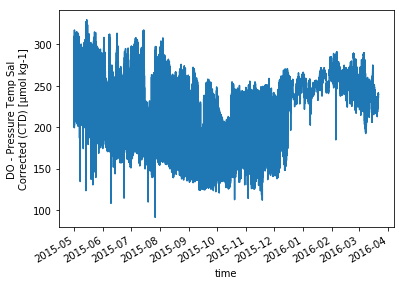

In [19]:
# Given the amount of data, this takes a while to plot
ds['dofst_k_oxygen_l2'].plot()
plt.show();

The full depth range of the profiler is included, but it gives us an overview of the data. Now let's recall the annotation.  The Wire-Following Profiler was converted into a fixed-depth instrument to prolong the battery endurance from 12/16/2015 to 1/30/2016. We do see that the dissolved oxygen range became smaller from 12/16/2015.  Let's plot the pressure data as a second check.

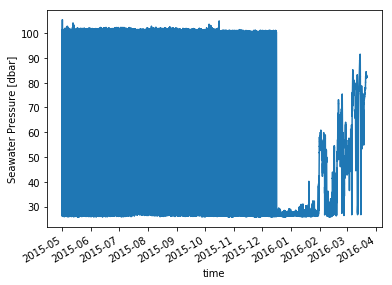

In [20]:
ds['int_ctd_pressure'].plot()
plt.show();

This pressure plot shows that the profiler stop doing full depth profiles since December 2015.

Next, let's plot the quality control flag. 

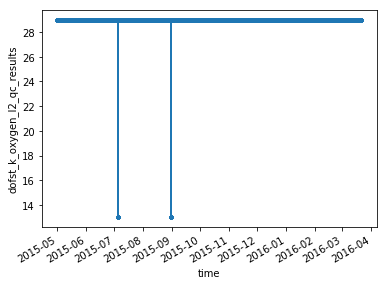

In [21]:
ds['dofst_k_oxygen_l2_qc_results'].plot(marker='.',linestyle=None)
plt.show();

There are two data points that have a qc_executed value that is NOT 29.  All other data points passes all tests for QC flags.  All data points look good for deployment 4. 

Here are some histograms to see the full range of data.

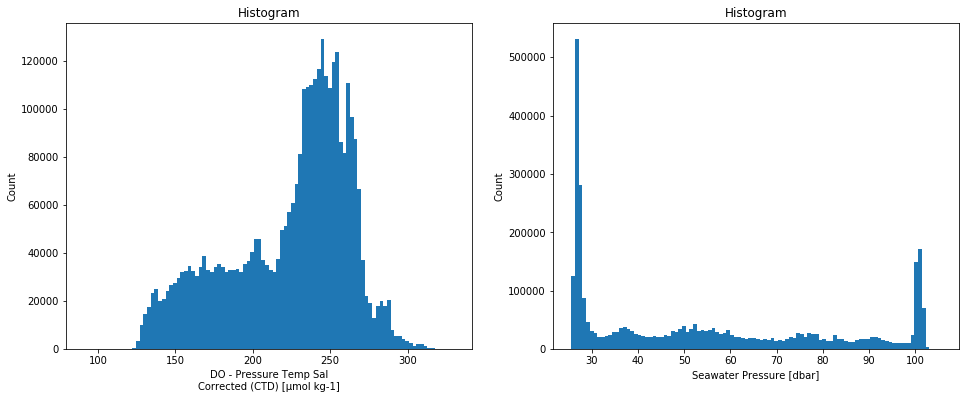

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ds['dofst_k_oxygen_l2'].plot.hist(bins=100, ax=ax1)
ds['int_ctd_pressure'].plot.hist(bins=100, ax=ax2);

The dissolved oxygen data doesn't appear to include any significant outliers.  The seawater pressure histgram shows that the profiler mooring samples more surface water.


Let's create a profile timeseries to better understand the full dataset. I also plot temperature and salinity because they affect solubility and thus have an influence on dissolved oxygen.  

In [23]:
dtime = ds['time'].values
pressure = ds['int_ctd_pressure'].values
oxygen = ds['dofst_k_oxygen_l2'].values
temperature = ds['ctdpf_ckl_seawater_temperature'].values
salinity = ds['practical_salinity'].values

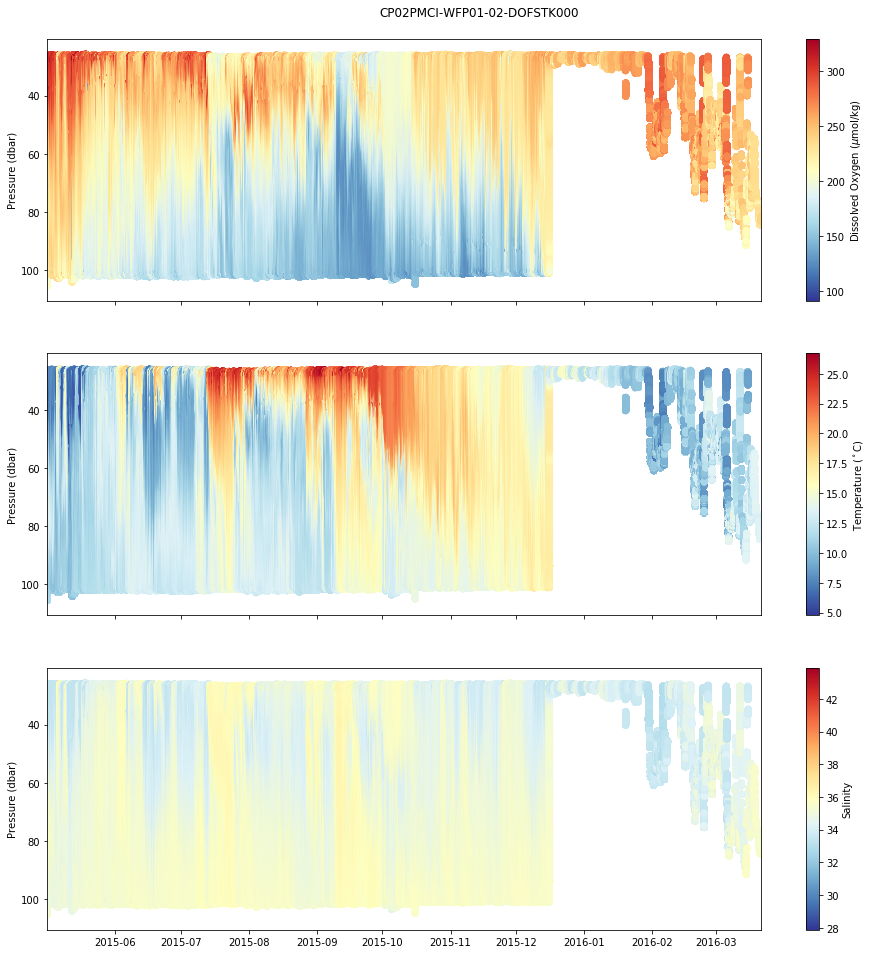

In [24]:
# Scatterplots of Dissolved Oxygen, Temperature, and Salinity

fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(16,15))
sc1 = ax1.scatter(dtime, pressure, c=oxygen, cmap='RdYlBu_r') 
sc2 = ax2.scatter(dtime, pressure, c=temperature, cmap='RdYlBu_r')
sc3 = ax3.scatter(dtime, pressure, c=salinity, cmap='RdYlBu_r')

ax1.invert_yaxis() # Invert y axis
ax1.set_xlim(dtime[0],dtime[-1]) # Set the time limits to match the dataset

cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical')
cbar.ax.set_ylabel('Dissolved Oxygen ($\mu$mol/kg)')

cbar = fig.colorbar(sc2, ax=ax2, orientation='vertical')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')

cbar = fig.colorbar(sc3, ax=ax3, orientation='vertical')
cbar.ax.set_ylabel('Salinity')

ax1.set_ylabel('Pressure (dbar)')
ax2.set_ylabel('Pressure (dbar)')
ax3.set_ylabel('Pressure (dbar)')

fig.suptitle('CP02PMCI-WFP01-02-DOFSTK000')
fig.subplots_adjust(top=0.95);

From the above fiugre, we can see that (1) The surface water has higher dissolved oxygen values than the deep water; (2) The penetration of the dissolved oxygen decreased in the summer, which is reasonable because of the vertical mixing became weak during the summer. These observations align with known physical processes. Another notable result is that the dissolved oxygen decreases as the increase of temperature. No notable sensor drift is detected.

## 5. A closer look
Now let's look at one week around the switchover between Deployments 3 and 4.  Let's firstly have a look at the profile time series around the changeover between the two deployments.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Subsetting the dataset.

In [26]:
a = ds.sel(time=slice('2015-10-12', '2015-10-18'))

In [27]:
print(ds.time.size)
print(a.time.size)

3448369
53737


In [28]:
# Extract time range from ds

ds1 = ds.sel(time=slice('2015-10-12 00:00:00', '2015-10-18 00:00:00'))

In [29]:
# Extract the values
dtime1 = ds1['time'].values
pressure1 = ds1['int_ctd_pressure'].values
oxygen1 = ds1['dofst_k_oxygen_l2'].values

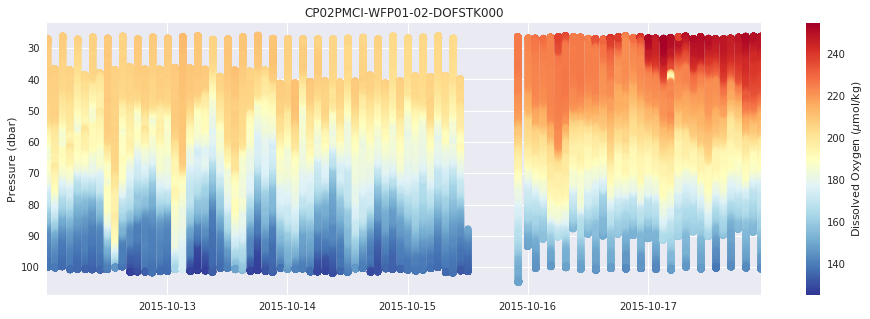

In [30]:
# Scatterplot of dissolved oxygen
fig,ax1 = plt.subplots(1,1,figsize=(16,5))
sc1 = ax1.scatter(dtime1, pressure1, c=oxygen1, cmap='RdYlBu_r') # Add s=2 to set the markersize
ax1.invert_yaxis() # Invert y axis
ax1.set_xlim(dtime1[0],dtime1[-1]) # Set the time limits to match the dataset
cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical')
cbar.ax.set_ylabel('Dissolved Oxygen ($\mu$mol/kg)')
ax1.set_ylabel('Pressure (dbar)')
ax1.set_title('CP02PMCI-WFP01-02-DOFSTK000');

In general, the dissolved oxygen looks consistent during the week of changeover from Deployment 3 to Deployment 4.  The beginning few days of Deployment 4 has higher dissolved oxygen near the surface than the few days at the end of Deployment 3.

Now let's compare two depth profiles before and after Deployment 4.

In [31]:
dtime1

array(['2015-10-12T00:00:02.000000000', '2015-10-12T00:00:03.018691584',
       '2015-10-12T00:00:04.037383168', ...,
       '2015-10-17T22:38:52.948571136', '2015-10-17T22:38:53.965714432',
       '2015-10-17T22:38:54.982857216'], dtype='datetime64[ns]')

(120, 0)

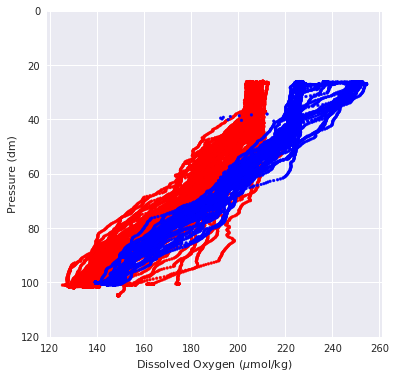

In [32]:
# Profile plot of dissolved oxygen
fig,ax1 = plt.subplots(1,1,figsize=(6,6))

# Create a color map to divide the two deployments
kcolors = ['red' if t<np.datetime64('2015-10-16') else 'blue' for t in dtime1]

ax1.scatter(oxygen1,pressure1, c=kcolors, s=8)
# ax1.plot(p_temp,p_pr,'r.')
ax1.set_xlabel('Dissolved Oxygen ($\mu$mol/kg)')
ax1.set_ylabel('Pressure (dm)')
# ax1.invert_yaxis()
ax1.set_ylim(120,0)


Data before the redeployment is plotting in red, and after is blue.  The two deployments have overlap for water that is deeper than 50 meters. For water depth that is less than 50 meters, the dissolved oxygen values of deployment 4 are overall higher than the values of deployment 3, except ~8 points that have overlap.  Since the surface dissolved oxygen can change quickly considering some processes such as the air-sea gas exchange and photosynthesis, further investigation is needed.  

There are so many profiles within one day!  Let's further subset the dataset and have a further closer look at the data.

In [33]:
# Extract time range from ds
#Select the profile at the end of the deployment 3.

ds2 = ds.sel(time=slice('2015-10-15 9:00:00', '2015-10-15 23:00:00'))

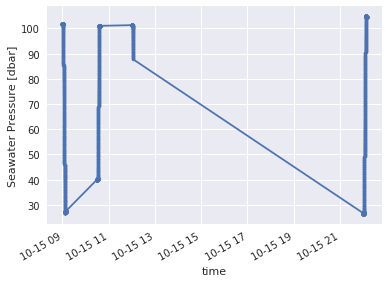

In [34]:
ds2['int_ctd_pressure'].plot(marker='.',linestyle=None)
plt.show();

It looks that the changeover was made between 2015-10-15 11:00:00 and 2015-10-15 21:00:00.  I select the profile between 2015-10-15 10:00:00 and 2015-10-15 11:00:00 and compare this profile with the profile between 2015-10-15 21:00:00 and 2015-10-15 23:00:00.

In [35]:
# Extract time range from ds
#The CTD cast was operated from 2015-10-16 14:35:21
#Select the profile at the end of the deployment 3.

ds3 = ds.sel(time=slice('2015-10-15 10:00:00', '2015-10-15 11:00:00'))

In [36]:
# Extract the values
dtime3 = ds3['time'].values
pressure3 = ds3['int_ctd_pressure'].values
oxygen3 = ds3['dofst_k_oxygen_l2'].values

In [37]:
# Extract time range from ds
#Select the profile at the beginning of the deployment 4.

ds4 = ds.sel(time=slice('2015-10-15 21:00:00', '2015-10-15 23:00:00'))

In [38]:
# Extract the values
dtime4 = ds4['time'].values
pressure4 = ds4['int_ctd_pressure'].values
oxygen4 = ds4['dofst_k_oxygen_l2'].values

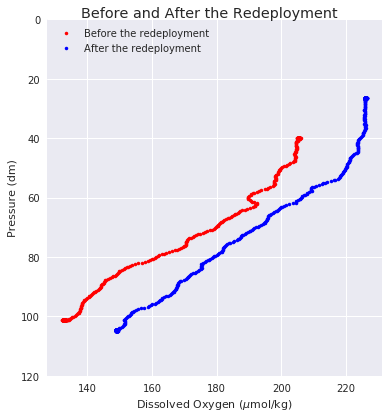

In [39]:
# Now let's plot them together
fig,ax1 = plt.subplots(1,1,figsize=(6,6))

ax1.plot(oxygen3,pressure3,'r.',label = 'Before the redeployment')
ax1.plot(oxygen4,pressure4,'b.', label = 'After the redeployment')
ax1.set_xlabel('Dissolved Oxygen ($\mu$mol/kg)')
ax1.set_ylabel('Pressure (dm)')
# ax1.invert_yaxis()
ax1.set_ylim(120,0)

fig.suptitle('Before and After the Redeployment')
fig.subplots_adjust(top=0.95)
legend = ax1.legend(loc='upper left', shadow=True, fontsize='small');


It is more clear that the dissolved oxygen data after the redeployment is higher than the data before the redeployment for all depths.  The average difference is ~15 $\mu$mol/kg.  Since the dissolved oxygen data after the redeployment is higher than the data before the deployment in all depths, it seems that this is likely due to the drift of the SBE 43F oxygen sensor.  However, considering this is a coastal site, it is possible that dissolved oxygen change this large within one day.

## 6. Comparison with shipboard dissolved oxygen
Finally, we compare the profiler's dissolved oxygen with data collected during the Pioneer 5 Cruise, Leg 2, CTD Cast #8, which occurred on 2015-10-16 14:35:21 UTC.  

The shipboard dissolved oxygen was measured by the instrument SBE 43.  An overview of the SBE 43 Dissolved Oxygen Sensor can be found [here](https://www.seabird.com/oxygen-sensors/sbe-43-dissolved-oxygen-sensor/family?productCategoryId=54627869932).  At the pioneer coastal inshore profiler mooring, we know that the instrument SBE 43F is used to measure dissolved oxygen from the metadata (Part 3a).  Note that the SBE 43 and SBE 43F are individually calibrated, but both of them are high-accuracy oxygen sensors.  

The raw ascii data file for the CTD cast can be found at the following location. 

In [40]:
# First, specify the data file for the cruise CTD cast
# I use the up cast measurement because the up cast because the rosette bottles are usually fired during the up cast.

import pandas as pd
import os
import time
from datetime import datetime

cruise_data_file = 'https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/534f49c6-a151-477c-9117-3c793c360ee6/at31b_008_down.asc'
cruise_data = pd.read_table(cruise_data_file, delim_whitespace=True, header=None)

#The curise data file does not have headers. The headers are stored in another file.
#Add back the necessary headers
cruise_data = cruise_data.rename(columns={4:'Pressure', 15:'Density', 22:'Oxygen'})

In [41]:
# Extract time range from ds

ds5 = ds.sel(time=slice('2015-10-16 00:00:00', '2015-10-17 00:00:00'))

In [42]:
# Extract the values
dtime5 = ds5['time'].values
pressure5 = ds5['int_ctd_pressure'].values
oxygen5 = ds5['dofst_k_oxygen_l2'].values

The cruise dissolved oxygen has a unit of ml/l, while the profiler dissolved oxygen has a unit of $\mu$mol/kg.  Let's convert the cruise dissolved oxygen unit from ml/l to $\mu$mol/kg using density.  I use the following equation for the conversion.  
Dissolved oxygen ($\mu$mol/kg) = Dissolved oxygen (ml/l) * 44659.6 / Potential density (kg/m^3)

In [43]:
oxygen_c=cruise_data.Oxygen * 44659.6 / cruise_data.Density

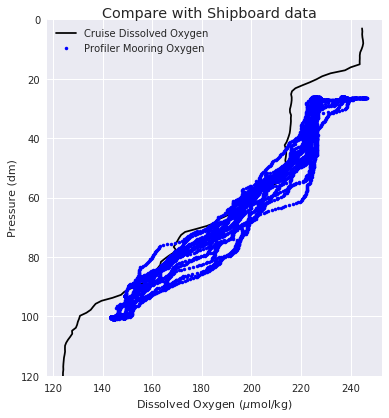

In [44]:
# Now let's plot the Cruise and Profiler data together
fig,ax1 = plt.subplots(1,1,figsize=(6,6))

ax1.plot(oxygen_c,cruise_data.Pressure,'k',label = 'Cruise Dissolved Oxygen')
ax1.plot(oxygen5,pressure5,'b.', label = 'Profiler Mooring Oxygen')
ax1.set_xlabel('Dissolved Oxygen ($\mu$mol/kg)')
ax1.set_ylabel('Pressure (dm)')
# ax1.invert_yaxis()
ax1.set_ylim(120,0)

fig.suptitle('Compare with Shipboard data')
fig.subplots_adjust(top=0.95)
legend = ax1.legend(loc='upper left', shadow=True, fontsize='small');


In general, the data from the CTD cast aligns good with the profiler data from the same day, especially for the water depth that is larger than 50 meters.  In the shallow water (depth < 50 m), the profiler data is larger than the ship data.

Note that the dissolved oxygen values vary a lot within one day.  Next, I will narrowdown the time range of the profiler and select the time that is closer to the CTD cast.

In [45]:
# Extract time range from ds
#The CTD cast was operated from 2015-10-16 14:35:21

ds6 = ds.sel(time=slice('2015-10-16 13:00:00', '2015-10-16 16:00:00'))

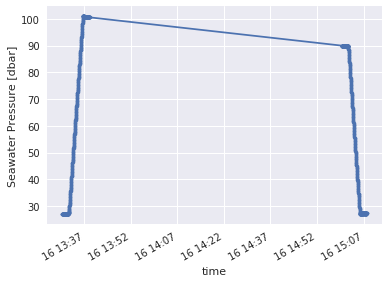

In [46]:
ds6['int_ctd_pressure'].plot(marker='.',linestyle=None)
plt.show();

In [19]:
# Extract time range from ds
#The CTD cast was operated from 2015-10-16 14:35:21
#Extract the profile that is just before the CTD cast

ds7 = ds.sel(time=slice('2015-10-16 13:00:00', '2015-10-16 14:00:00'))

In [20]:
# Extract the values
dtime7 = ds7['time'].values
pressure7 = ds7['int_ctd_pressure'].values
oxygen7 = ds7['dofst_k_oxygen_l2'].values

In [24]:
# Extract time range from ds
#The CTD cast was operated from 2015-10-16 14:35:21
#Extract the profile that is just after the CTD cast

ds8 = ds.sel(time=slice('2015-10-16 14:50:00', '2015-10-16 15:50:00'))

In [25]:
# Extract the values
dtime8 = ds8['time'].values
pressure8 = ds8['int_ctd_pressure'].values
oxygen8 = ds8['dofst_k_oxygen_l2'].values

Now plot the comparison figure again.

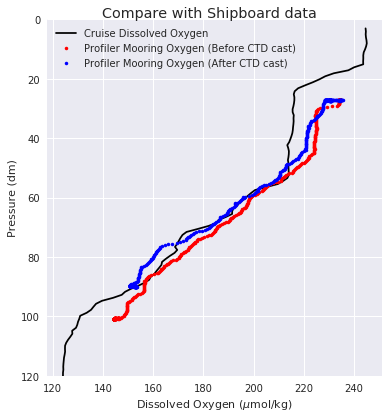

In [37]:
# Now let's plot the Cruise and Profiler data together
fig,ax1 = plt.subplots(1,1,figsize=(6,6))

ax1.plot(oxygen_c,cruise_data.Pressure,'k',label = 'Cruise Dissolved Oxygen')
ax1.plot(oxygen7,pressure7,'r.', label = 'Profiler Mooring Oxygen (Before CTD cast)')
ax1.plot(oxygen8,pressure8,'b.', label = 'Profiler Mooring Oxygen (After CTD cast)')
ax1.set_xlabel('Dissolved Oxygen ($\mu$mol/kg)')
ax1.set_ylabel('Pressure (dm)')
# ax1.invert_yaxis()
ax1.set_ylim(120,0)

fig.suptitle('Compare with Shipboard data')
fig.subplots_adjust(top=0.95)
legend = ax1.legend(loc='upper left', shadow=True, fontsize='small');


The profiler went down around 2015-10-16 13:37:00 and wend up around 2015-10-16 15:07:00.  The  up going profile is only half an hour later than the CTD cast.  The comparison with the ship oxygen data is very well for water depth >50 m.  The down going profile is around 1 hour before the CTD cast.  The profiler oxygen data also matches well with the ship oxygen data.

Let's compare the shipboard data with the data around the redeployment to address the potential sensor drift issure at the end of Deployement 3.

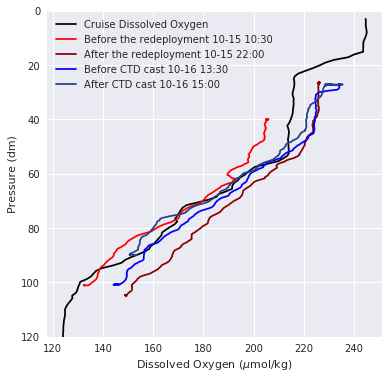

In [52]:
fig,ax1 = plt.subplots(1,1,figsize=(6,6))

ax1.plot(oxygen_c,cruise_data.Pressure,'k',label = 'Cruise Dissolved Oxygen')
ax1.plot(oxygen3,pressure3,'r',label = 'Before the redeployment 10-15 10:30')
ax1.plot(oxygen4,pressure4,'#8B0000', label = 'After the redeployment 10-15 22:00')
ax1.plot(oxygen7,pressure7,'b', label = 'Before CTD cast 10-16 13:30')
ax1.plot(oxygen8,pressure8,'#27408B', label = 'After CTD cast 10-16 15:00')
ax1.set_xlabel('Dissolved Oxygen ($\mu$mol/kg)')
ax1.set_ylabel('Pressure (dm)')
# ax1.invert_yaxis()
ax1.set_ylim(120,0)

legend = ax1.legend(loc='upper left', shadow=True, fontsize='small');


The profiler data before the reployment align well with the CTD data for water that is deepter than 50 meters.  It looks like the dissolved oxygen doesn't drift over time.  It worked well at least for half a year.

There is still a problem for shallow water (depth <50 m).  Further investigation is needed to detect the cause of the problem. 

## 7. Notable Results and Actions Needed


Below are some notable results based on this analysis of the Pioneer Inshore Profiler, 
* In general, the dissolved oxygen values during Deployments 3 and 4 look largely reasonable.  There are no major outliers.
* The surface water has higher dissolved oxygen values than the deep water; The penetration of the dissolved oxygen decreased in the summer, which is reasonable because of the vertical mixing became weak during the summer. These observations align with known physical processes.
* The profiler was inoperative in the middle of deployment 4, remaining at approximately 30 m depth, however the dissolved oxygen data still appears reasonable. An annotation concerning this is already available in the system.
* The profiler dissolved oxygen data agrees generally with a corresponding shipboard CTD cast.
* The profiler dissolved oxygen sensor generally work well within half a year.  No significant drift is detected in this report. 

I have some suggestions regarding the dissolved oxygen data at the Pioneer Inshore Profiler,
* Deployment 4 still use the same calibration as used in Deployment 3. New calibration is recommended for each deployment to reduce the possibility of potential sensor drift.
* In addition to the CTD cast after the redeployment, it would be ideal to have a CTD cast before the redeployment to confirm the stability of the dissolved oxygen sensor. 
* Discrete bottle dissolved oxygen measurement (Winkler Method) is recommended to further ensure the data quality.

It is very cool to explor OOI data using Python! 
